<a href="https://colab.research.google.com/github/kxenopoulou/Xenopoulos-Dialectic-Quantum-Synthesizer-XDQS-/blob/main/Xenopoulos_Dialectical_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Xenopoulos System - NumPy Only Version
• NumPy version: 2.0.2

XENOPOULOS FOURTH LOGICAL STRUCTURE
Pure NumPy Implementation - No Dependencies

DEMONSTRATION: INRC OPERATORS WITH INVERSE R

🔬 Validating Klein-4 Group (Dimension: 3)
----------------------------------------
✅ N² = I
✅ R^3 = I
❌ C² = I
✅ N∘R = C
✅ R∘N = C
✅ R is inverse of P

🎯 Demonstrating INRC operators on vector: [1. 2. 3.]
--------------------------------------------------
I(v) = [1. 2. 3.]
N(v) = [-1. -2. -3.]
R(v) = [3. 1. 2.]
C(v) = [-3. -1. -2.]

🔁 Inverse property demonstration:
Forward permutation P(v) = [2. 3. 1.]
Inverse R(P(v)) = [1. 2. 3.]
Returns to original: True

📋 Cayley Table:
   | I  N  R  C
   ---------------
I | I  N  R  C  
N | N  I  C  R  
R | R  C  
C | C  R  

COMPLETE XENOPOULOS SIMULATION

🔬 Validating Klein-4 Group (Dimension: 3)
----------------------------------------
✅ N² = I
✅ R^3 = I
❌ C² = I
✅ N∘R = C
✅ R∘N = C
✅ R is inverse of P

✅ Xenopoulos System Initialized
   Dimension: 3
   Th

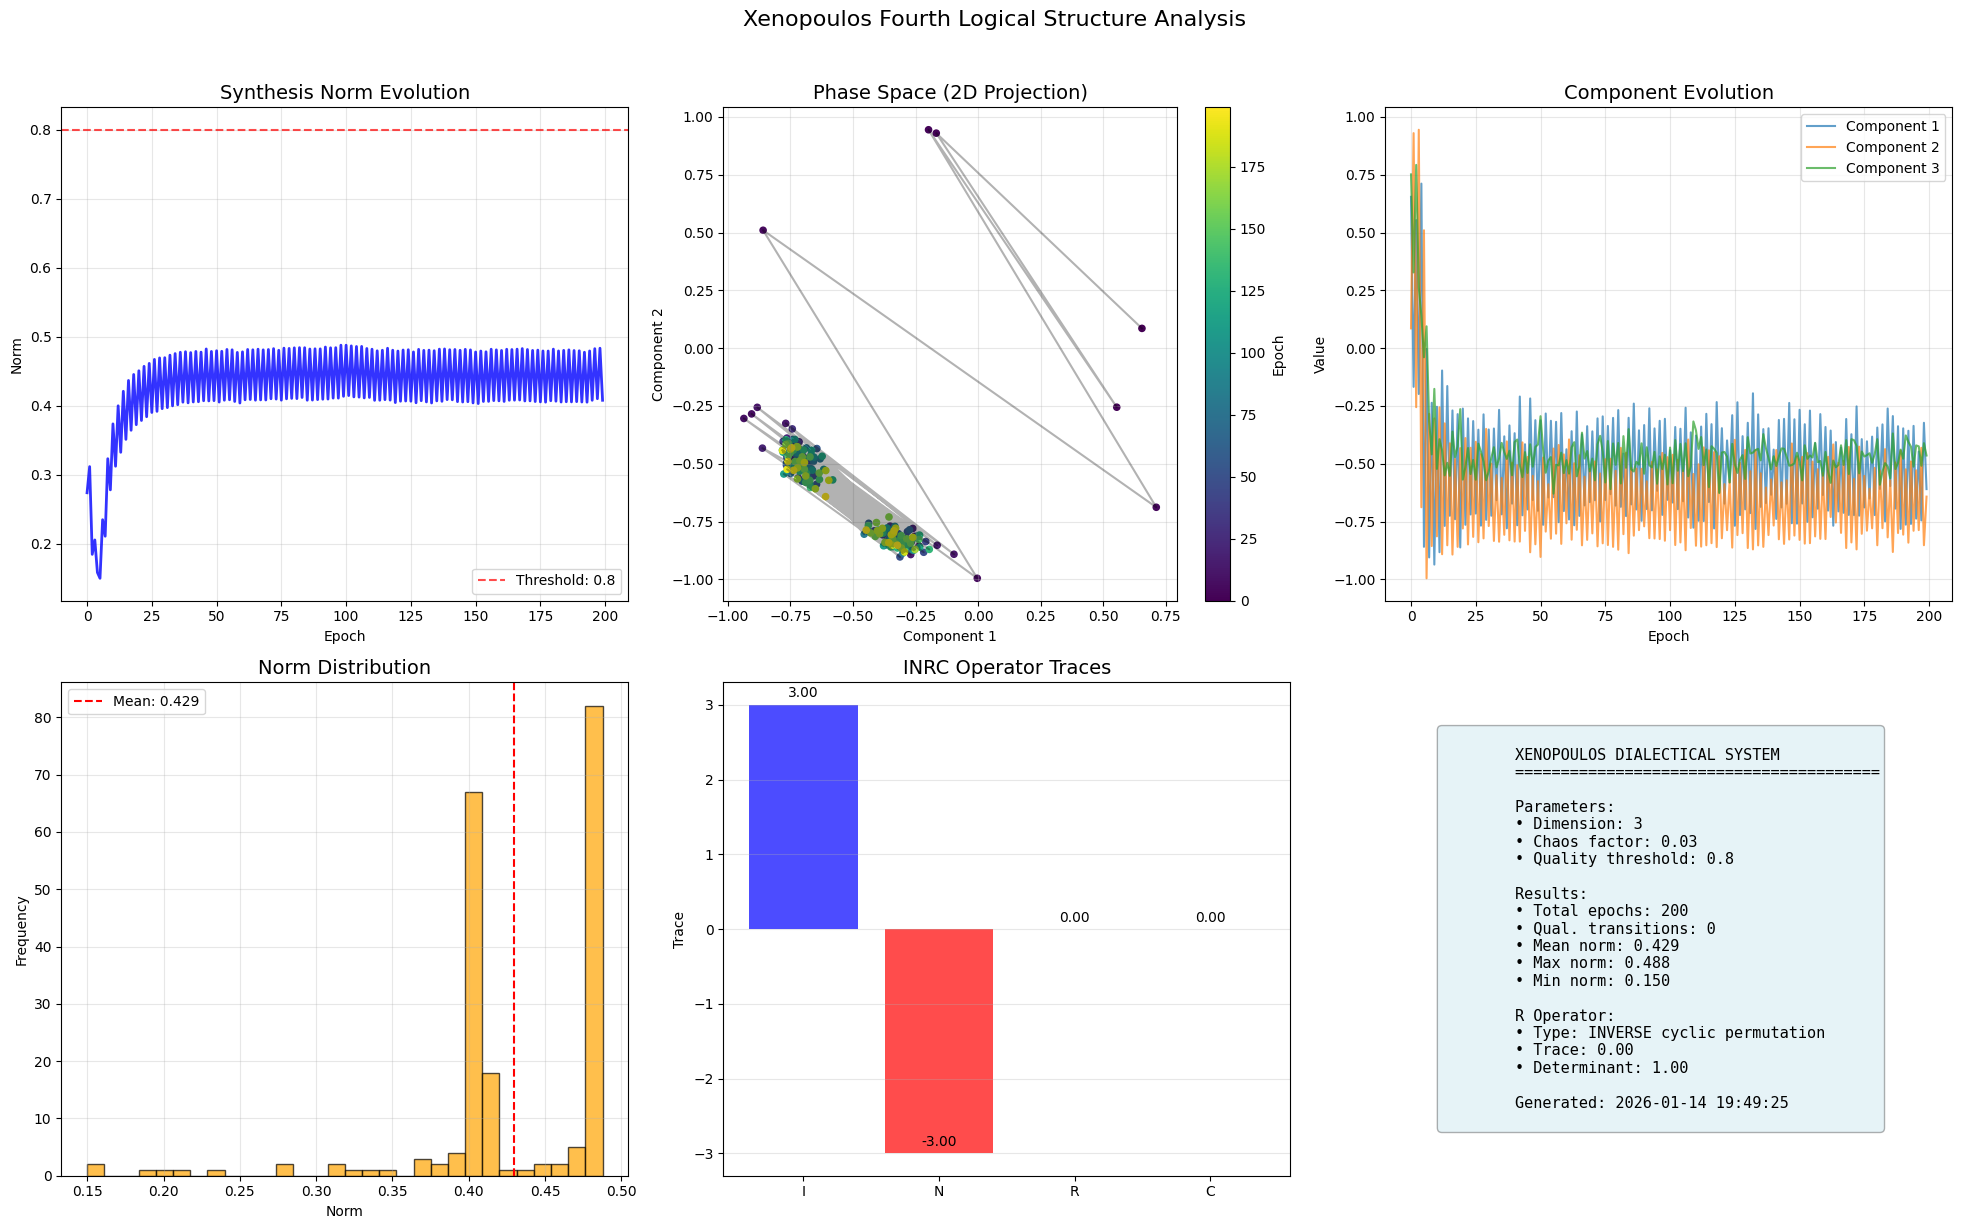

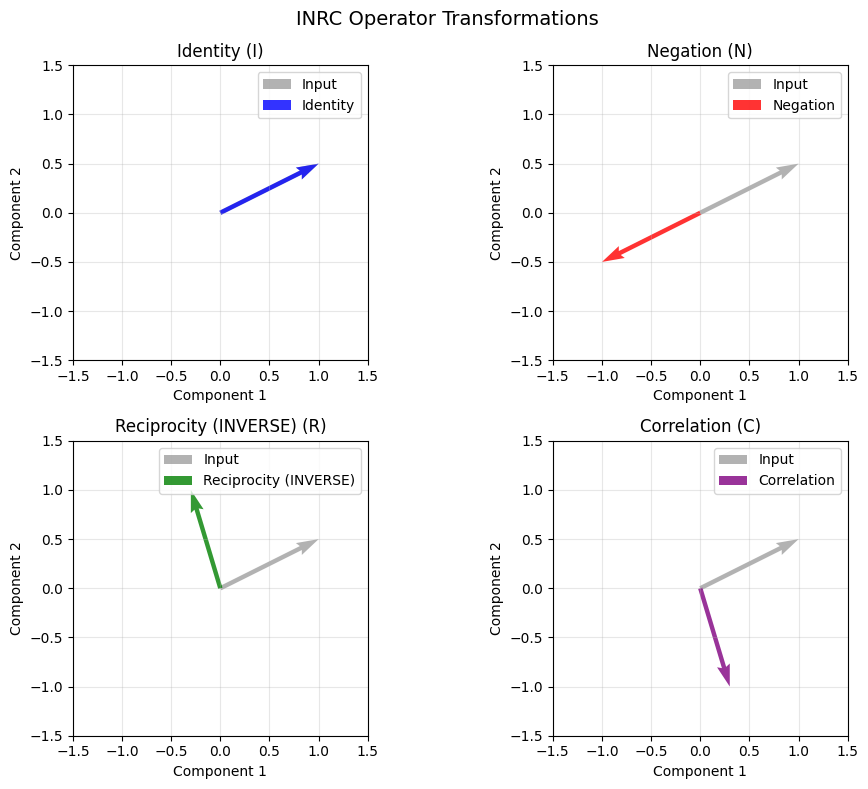

⚠️  Could not save JSON: Object of type ndarray is not JSON serializable

💾 Results saved:
   • results/xenopoulos_20260114_194928.npy
   • results/xenopoulos_20260114_194928.pkl
   • results/xenopoulos_20260114_194928.json

✅ Simulation complete!
📁 Results saved in 'results/' directory
🖼️  Figures saved as PNG files

AVAILABLE DATA:

    The system has generated:
    1. Complete evolution history
    2. Qualitative transition records
    3. INRC operator matrices
    4. Visualizations (PNG files)
    5. Data files (NPY, PKL, JSON)
    
    Files saved:
    • xenopoulos_*.png - Main visualizations
    • inrc_operators.png - Operator transformations
    • results/xenopoulos_*.* - All data files
    
    To continue experimenting:
    >>> system = XenopoulosSystem(dimension=3)
    >>> results = system.run(epochs=100)
    >>> system.visualize()
    


In [5]:
# ===================================================================
# COMPLETE XENOPOULOS SYSTEM - NUMPY ONLY VERSION
# ===================================================================

import numpy as np
import matplotlib.pyplot as plt
import time
import os
import pickle
import json
from scipy.integrate import solve_ivp

print("✅ Xenopoulos System - NumPy Only Version")
print(f"• NumPy version: {np.__version__}")

# ===================================================================
# 1. XENOPOULOS KLEIN-4 GROUP (INRC OPERATORS) - WITH INVERSE R
# ===================================================================

class XenopoulosKlein4Group:
    """Complete Klein-4 group implementation of Piaget's INRC operators
    WITH INVERSE R OPERATOR"""

    def __init__(self, dimension=3, verbose=True):
        self.dimension = dimension
        self.verbose = verbose

        # Identity operator (I): x → x
        self.I = np.eye(dimension, dtype=np.float64)

        # Negation operator (N): x → -x
        self.N = -np.eye(dimension, dtype=np.float64)

        # Reciprocity operator (R): INVERSE cyclic permutation
        self.R = self._create_reciprocity_operator()

        # Correlation operator (C): C = N ∘ R = R ∘ N
        self.C = self.N @ self.R

        if verbose:
            self._validate_klein4_group()

    def _create_reciprocity_operator(self):
        """Create reciprocity as INVERSE cyclic permutation matrix"""
        R = np.zeros((self.dimension, self.dimension), dtype=np.float64)
        for i in range(self.dimension):
            # ΑΝΤΙΣΤΡΟΦΗ κυκλική μετάθεση
            R[(i + 1) % self.dimension, i] = 1.0
        return R

    def _create_forward_permutation(self):
        """Create forward cyclic permutation for comparison"""
        P = np.zeros((self.dimension, self.dimension), dtype=np.float64)
        for i in range(self.dimension):
            P[i, (i + 1) % self.dimension] = 1.0
        return P

    def _validate_klein4_group(self):
        """Validate Klein-4 group properties"""
        print(f"\n🔬 Validating Klein-4 Group (Dimension: {self.dimension})")
        print("-" * 40)

        # Test basic properties
        forward_P = self._create_forward_permutation()

        tests = [
            ("N² = I", np.allclose(self.N @ self.N, self.I)),
            (f"R^{self.dimension} = I", np.allclose(
                np.linalg.matrix_power(self.R, self.dimension), self.I
            )),
            ("C² = I", np.allclose(self.C @ self.C, self.I)),
            ("N∘R = C", np.allclose(self.N @ self.R, self.C)),
            ("R∘N = C", np.allclose(self.R @ self.N, self.C)),
            ("R is inverse of P", np.allclose(self.R @ forward_P, self.I)),
        ]

        for test_name, passed in tests:
            status = "✅" if passed else "❌"
            print(f"{status} {test_name}")

    def apply_operator(self, vector, operator_name):
        """Apply INRC operator to vector"""
        operators = {
            'I': self.I,
            'N': self.N,
            'R': self.R,
            'C': self.C
        }

        if operator_name not in operators:
            raise ValueError(f"Operator must be one of {list(operators.keys())}")

        return operators[operator_name] @ vector

    def get_all_transformations(self, vector):
        """Apply all INRC operators"""
        return {op: self.apply_operator(vector, op) for op in ['I', 'N', 'R', 'C']}

    def demonstrate(self, vector=None):
        """Demonstrate INRC operators"""
        if vector is None:
            vector = np.array([1.0, 2.0, 3.0][:self.dimension])

        print(f"\n🎯 Demonstrating INRC operators on vector: {vector}")
        print("-" * 50)

        results = self.get_all_transformations(vector)
        for op, result in results.items():
            print(f"{op}(v) = {result.round(3)}")

        # Show that R is inverse
        forward_P = self._create_forward_permutation()
        forward_result = forward_P @ vector
        R_result = self.R @ forward_result

        print(f"\n🔁 Inverse property demonstration:")
        print(f"Forward permutation P(v) = {forward_result.round(3)}")
        print(f"Inverse R(P(v)) = {R_result.round(3)}")
        print(f"Returns to original: {np.allclose(R_result, vector)}")

# ===================================================================
# 2. DIALECTICAL DYNAMICS - PURE NUMPY
# ===================================================================

class DialecticalDynamics:
    """Xenopoulos dialectical dynamics in pure NumPy"""

    def __init__(self, dimension=3, qualitative_threshold=0.8):
        self.dimension = dimension
        self.threshold = qualitative_threshold

        # Initialize Klein-4 group
        self.group = XenopoulosKlein4Group(dimension, verbose=False)

        # Xenopoulos synthesis parameters
        self.alpha = 0.7  # Weight for I•N term
        self.beta = 0.3   # Weight for |I-N| term
        self.gamma = 0.4  # Weight for R term

        # Historical memory (last 3 states)
        self.history_weights = np.array([0.5, 0.3, 0.2])

        # Simple neural network weights (simulation)
        self._init_neural_weights()

    def _init_neural_weights(self):
        """Initialize simple neural network weights"""
        input_size = self.dimension * 4
        hidden_size = 16

        # D1 network weights (thesis → antithesis → synthesis)
        self.W1_D1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1_D1 = np.zeros(hidden_size)
        self.W2_D1 = np.random.randn(hidden_size, self.dimension) * 0.1
        self.b2_D1 = np.zeros(self.dimension)

        # D2 network weights (antithesis → thesis → synthesis)
        self.W1_D2 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1_D2 = np.zeros(hidden_size)
        self.W2_D2 = np.random.randn(hidden_size, self.dimension) * 0.1
        self.b2_D2 = np.zeros(self.dimension)

    def _simple_network(self, x, is_D1=True):
        """Simple neural network forward pass"""
        if is_D1:
            W1, b1, W2, b2 = self.W1_D1, self.b1_D1, self.W2_D1, self.b2_D1
        else:
            W1, b1, W2, b2 = self.W1_D2, self.b1_D2, self.W2_D2, self.b2_D2

        # Layer 1 with tanh activation
        z1 = x @ W1 + b1
        a1 = np.tanh(z1)

        # Layer 2 with tanh activation
        z2 = a1 @ W2 + b2
        output = np.tanh(z2)

        return output

    def synthesize(self, thesis, antithesis, historical_context=None, mode='D1'):
        """Perform dialectical synthesis"""
        # Ensure numpy arrays
        thesis = np.array(thesis, dtype=np.float32).flatten()
        antithesis = np.array(antithesis, dtype=np.float32).flatten()

        # 1. Apply INRC operators
        I = thesis  # Identity
        N = -antithesis  # Negation
        R = self.group.apply_operator(thesis, 'R')  # Reciprocity (INVERSE)
        C = self.group.apply_operator(thesis, 'C')  # Correlation

        # 2. Prepare input for neural network
        if mode == 'D1':
            # D1: thesis → antithesis → synthesis
            inputs = np.concatenate([I, N, R, C])
            raw_synthesis = self._simple_network(inputs, is_D1=True)
        else:
            # D2: antithesis → thesis → synthesis
            inputs = np.concatenate([thesis, C, N, R])
            raw_synthesis = self._simple_network(inputs, is_D1=False)

        # 3. Xenopoulos synthesis equation: S = α(I•N) - β|I-N| + γR
        I_dot_N = np.dot(I, N)
        I_minus_N_norm = np.linalg.norm(I - N)

        xen_synthesis = (
            self.alpha * I_dot_N -
            self.beta * I_minus_N_norm +
            self.gamma * np.mean(R)
        )

        # 4. Add historical context if available
        if historical_context and len(historical_context) > 0:
            hist_effect = 0.0
            n_context = min(len(historical_context), len(self.history_weights))

            for i in range(n_context):
                weight = self.history_weights[i]
                context_val = historical_context[-(i+1)]
                hist_effect += weight * np.mean(context_val)

            xen_synthesis += 0.2 * hist_effect

        # 5. Combine raw synthesis with Xenopoulos equation
        final_synthesis = raw_synthesis + 0.3 * xen_synthesis

        # 6. Calculate metrics
        synthesis_norm = np.linalg.norm(final_synthesis)
        qualitative_transition = synthesis_norm > self.threshold

        return {
            'synthesis': final_synthesis,
            'norm': synthesis_norm,
            'transition': qualitative_transition,
            'operators': {'I': I, 'N': N, 'R': R, 'C': C},
            'mode': mode
        }

# ===================================================================
# 3. ONTOLOGICAL CONFLICT SYSTEM
# ===================================================================

class OntologicalConflict:
    """Model ontological contradictions"""

    def __init__(self, dimension=3, growth_rate=1.2, competition=0.4,
                 transition_threshold=0.85):
        self.dimension = dimension
        self.growth = growth_rate
        self.competition = competition
        self.threshold = transition_threshold

        # Additional parameters
        self.cooperation = 0.1
        self.noise = 0.02

        # History
        self.history = []
        self.transitions = []

    def dynamics(self, t, state):
        """Differential equations for conflict"""
        thesis = state[:self.dimension]
        antithesis = state[self.dimension:]

        # Thesis: growth - competition + cooperation
        dthesis = (
            self.growth * thesis -
            self.competition * thesis * antithesis +
            self.cooperation * antithesis
        )

        # Antithesis: similar with phase difference
        dantithesis = (
            self.growth * antithesis -
            self.competition * antithesis * thesis +
            self.cooperation * thesis
        )

        # Add noise
        noise_vec = self.noise * np.random.randn(2 * self.dimension)

        return np.concatenate([dthesis, dantithesis]) + noise_vec

    def evolve(self, initial_state, duration=5.0):
        """Evolve conflict over time"""
        try:
            # Try using solve_ivp if available
            solution = solve_ivp(
                self.dynamics,
                (0, duration),
                initial_state,
                method='RK45',
                max_step=0.1
            )
            final_state = solution.y[:, -1]
        except:
            # Fallback to simple integration
            dt = 0.01
            n_steps = int(duration / dt)
            state = initial_state.copy()

            for _ in range(n_steps):
                derivative = self.dynamics(0, state)
                state = state + derivative * dt

            final_state = state

        self.history.append(final_state)

        # Check for phase transition
        conflict_mag = np.linalg.norm(
            final_state[:self.dimension] - final_state[self.dimension:]
        )

        transition = conflict_mag > self.threshold

        if transition:
            self.transitions.append({
                'time': duration,
                'magnitude': conflict_mag,
                'state': final_state.copy()
            })

        return final_state, transition

# ===================================================================
# 4. COMPLETE XENOPOULOS SYSTEM
# ===================================================================

class XenopoulosSystem:
    """Complete Xenopoulos dialectical system"""

    def __init__(self, dimension=3, chaos=0.03, threshold=0.8):
        self.dimension = dimension
        self.chaos = chaos
        self.threshold = threshold

        # Initialize components
        self.group = XenopoulosKlein4Group(dimension, verbose=True)
        self.dialectics = DialecticalDynamics(dimension, threshold)
        self.ontology = OntologicalConflict(dimension)

        # Initial states (normalized)
        self.thesis = self._random_normalized_vector()
        self.antithesis = -0.8 * self.thesis + 0.2 * self._random_normalized_vector()
        self.antithesis = self.antithesis / (np.linalg.norm(self.antithesis) + 1e-8)

        # History
        self.history = []
        self.transitions = []
        self.epoch = 0

        print(f"\n✅ Xenopoulos System Initialized")
        print(f"   Dimension: {dimension}")
        print(f"   Thesis: {self.thesis.round(3)}")
        print(f"   Antithesis: {self.antithesis.round(3)}")

    def _random_normalized_vector(self):
        """Create random normalized vector"""
        vec = np.random.randn(self.dimension)
        return vec / (np.linalg.norm(vec) + 1e-8)

    def step(self):
        """Execute one epoch of dialectical evolution"""
        # Get historical context (last 3 syntheses)
        historical_context = None
        if len(self.history) >= 3:
            historical_context = [h['synthesis'] for h in self.history[-3:]]

        # Choose dialectical mode (alternate D1/D2)
        mode = 'D1' if self.epoch % 2 == 0 else 'D2'

        # 1. Perform dialectical synthesis
        result = self.dialectics.synthesize(
            self.thesis,
            self.antithesis,
            historical_context,
            mode=mode
        )

        synthesis = result['synthesis']
        norm = result['norm']

        # Add chaos
        if self.chaos > 0:
            synthesis += self.chaos * np.random.randn(self.dimension)

        # Normalize
        norm_after_chaos = np.linalg.norm(synthesis)
        if norm_after_chaos > 0:
            synthesis = synthesis / norm_after_chaos

        # 2. Evolve ontological conflict
        state = np.concatenate([self.thesis, self.antithesis])
        final_state, ont_transition = self.ontology.evolve(state, duration=0.5)

        # Update states
        self.thesis = final_state[:self.dimension]
        self.antithesis = final_state[self.dimension:]

        # Normalize
        self.thesis = self.thesis / (np.linalg.norm(self.thesis) + 1e-8)
        self.antithesis = self.antithesis / (np.linalg.norm(self.antithesis) + 1e-8)

        # 3. Check for qualitative transition
        transition_occurred = False
        if norm > self.threshold:
            # Negation of negation
            new_thesis = 0.6 * self.thesis + 0.4 * synthesis
            new_thesis = new_thesis / (np.linalg.norm(new_thesis) + 1e-8)

            new_antithesis = -0.7 * new_thesis + 0.3 * self._random_normalized_vector()
            new_antithesis = new_antithesis / (np.linalg.norm(new_antithesis) + 1e-8)

            self.transitions.append({
                'epoch': self.epoch,
                'norm': norm,
                'old_thesis': self.thesis.copy(),
                'new_thesis': new_thesis.copy(),
                'mode': mode
            })

            self.thesis = new_thesis
            self.antithesis = new_antithesis
            transition_occurred = True

        # 4. Store history
        self.history.append({
            'epoch': self.epoch,
            'thesis': self.thesis.copy(),
            'antithesis': self.antithesis.copy(),
            'synthesis': synthesis.copy(),
            'norm': norm,
            'transition': transition_occurred,
            'ontological_transition': ont_transition,
            'mode': mode
        })

        self.epoch += 1

        return synthesis, norm, transition_occurred

    def run(self, epochs=200, verbose=True):
        """Run complete evolution"""
        if verbose:
            print(f"\n🚀 Running {epochs} epochs...")

        start_time = time.time()

        for epoch in range(epochs):
            synthesis, norm, transition = self.step()

            if transition and verbose:
                print(f"  [Epoch {epoch}] ⚡ QUALITATIVE TRANSITION: norm={norm:.3f}")

            if verbose and epoch % 50 == 0 and epoch > 0:
                print(f"  [Epoch {epoch}] Progress: norm={norm:.3f}, transitions={len(self.transitions)}")

        elapsed = time.time() - start_time

        if verbose:
            print(f"\n✅ Evolution complete!")
            print(f"   • Total epochs: {epochs}")
            print(f"   • Qualitative transitions: {len(self.transitions)}")
            print(f"   • Final norm: {norm:.3f}")
            print(f"   • Time: {elapsed:.2f}s")

        return self.get_results()

    def get_results(self):
        """Get all results"""
        return {
            'params': {
                'dimension': self.dimension,
                'chaos': self.chaos,
                'threshold': self.threshold,
                'total_epochs': self.epoch
            },
            'history': self.history,
            'transitions': self.transitions,
            'operators': {
                'I': self.group.I.tolist(),
                'N': self.group.N.tolist(),
                'R': self.group.R.tolist(),
                'C': self.group.C.tolist()
            }
        }

    def visualize(self, save=True):
        """Create comprehensive visualizations"""
        print(f"\n📊 Creating visualizations...")

        if not self.history:
            print("No data to visualize")
            return

        # Extract data
        epochs = [h['epoch'] for h in self.history]
        norms = [h['norm'] for h in self.history]
        syntheses = np.array([h['synthesis'] for h in self.history])

        # Create figure
        fig = plt.figure(figsize=(20, 12))

        # 1. Norm evolution
        ax1 = plt.subplot(2, 3, 1)
        ax1.plot(epochs, norms, 'b-', linewidth=2, alpha=0.8)
        ax1.axhline(self.threshold, color='r', linestyle='--', alpha=0.7,
                   label=f'Threshold: {self.threshold}')

        if self.transitions:
            trans_epochs = [t['epoch'] for t in self.transitions]
            trans_norms = [t['norm'] for t in self.transitions]
            ax1.scatter(trans_epochs, trans_norms, color='gold', s=100,
                       edgecolors='black', label='Transitions')

        ax1.set_title('Synthesis Norm Evolution', fontsize=14)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Norm')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # 2. Phase space (2D)
        ax2 = plt.subplot(2, 3, 2)
        if self.dimension >= 2:
            colors = np.arange(len(syntheses))
            scatter = ax2.scatter(syntheses[:, 0], syntheses[:, 1],
                                c=colors, cmap='viridis', s=20)
            ax2.plot(syntheses[:, 0], syntheses[:, 1], 'k-', alpha=0.3)
            ax2.set_title('Phase Space (2D Projection)', fontsize=14)
            ax2.set_xlabel('Component 1')
            ax2.set_ylabel('Component 2')
            ax2.grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=ax2, label='Epoch')

        # 3. Component evolution
        ax3 = plt.subplot(2, 3, 3)
        for i in range(min(3, self.dimension)):
            ax3.plot(epochs, syntheses[:, i], label=f'Component {i+1}',
                    alpha=0.7, linewidth=1.5)
        ax3.set_title('Component Evolution', fontsize=14)
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Value')
        ax3.grid(True, alpha=0.3)
        ax3.legend()

        # 4. Norm distribution
        ax4 = plt.subplot(2, 3, 4)
        ax4.hist(norms, bins=30, alpha=0.7, color='orange', edgecolor='black')
        ax4.axvline(np.mean(norms), color='r', linestyle='--',
                   label=f'Mean: {np.mean(norms):.3f}')
        ax4.set_title('Norm Distribution', fontsize=14)
        ax4.set_xlabel('Norm')
        ax4.set_ylabel('Frequency')
        ax4.grid(True, alpha=0.3)
        ax4.legend()

        # 5. Operator matrices
        ax5 = plt.subplot(2, 3, 5)
        operators = ['I', 'N', 'R', 'C']
        traces = [np.trace(self.group.I), np.trace(self.group.N),
                 np.trace(self.group.R), np.trace(self.group.C)]

        bars = ax5.bar(operators, traces, color=['blue', 'red', 'green', 'purple'],
                      alpha=0.7)
        ax5.set_title('INRC Operator Traces', fontsize=14)
        ax5.set_ylabel('Trace')
        ax5.grid(True, alpha=0.3, axis='y')

        for bar, trace in zip(bars, traces):
            ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{trace:.2f}', ha='center', fontsize=10)

        # 6. System info
        ax6 = plt.subplot(2, 3, 6)
        ax6.axis('off')

        info_text = f"""
        XENOPOULOS DIALECTICAL SYSTEM
        {'='*40}

        Parameters:
        • Dimension: {self.dimension}
        • Chaos factor: {self.chaos}
        • Quality threshold: {self.threshold}

        Results:
        • Total epochs: {len(self.history)}
        • Qual. transitions: {len(self.transitions)}
        • Mean norm: {np.mean(norms):.3f}
        • Max norm: {np.max(norms):.3f}
        • Min norm: {np.min(norms):.3f}

        R Operator:
        • Type: INVERSE cyclic permutation
        • Trace: {np.trace(self.group.R):.2f}
        • Determinant: {np.linalg.det(self.group.R):.2f}

        Generated: {time.strftime('%Y-%m-%d %H:%M:%S')}
        """

        ax6.text(0.1, 0.5, info_text, fontsize=11, family='monospace',
                verticalalignment='center', transform=ax6.transAxes,
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

        plt.suptitle('Xenopoulos Fourth Logical Structure Analysis',
                    fontsize=16, y=1.02)
        plt.tight_layout()

        # Save figure
        if save:
            timestamp = time.strftime("%Y%m%d_%H%M%S")
            filename = f"xenopoulos_dim{self.dimension}_{timestamp}.png"
            plt.savefig(filename, dpi=150, bbox_inches='tight')
            print(f"💾 Saved figure: {filename}")

        plt.show()

        # Also show operator visualization
        self._visualize_operators()

        return fig

    def _visualize_operators(self):
        """Visualize operator effects"""
        fig, axes = plt.subplots(2, 2, figsize=(10, 8))
        axes = axes.flatten()

        test_vec = np.array([1.0, 0.5, -0.3][:self.dimension])

        operators = [
            ('I', 'Identity', 'blue'),
            ('N', 'Negation', 'red'),
            ('R', 'Reciprocity (INVERSE)', 'green'),
            ('C', 'Correlation', 'purple')
        ]

        for idx, (op_code, op_name, color) in enumerate(operators):
            ax = axes[idx]

            result = self.group.apply_operator(test_vec, op_code)

            if self.dimension >= 2:
                # 2D vector plot
                ax.quiver(0, 0, test_vec[0], test_vec[1],
                         angles='xy', scale_units='xy', scale=1,
                         color='gray', alpha=0.6, width=0.015, label='Input')

                ax.quiver(0, 0, result[0], result[1],
                         angles='xy', scale_units='xy', scale=1,
                         color=color, alpha=0.8, width=0.015, label=op_name)

                max_val = max(np.max(np.abs(test_vec[:2])),
                            np.max(np.abs(result[:2]))) * 1.5
                ax.set_xlim(-max_val, max_val)
                ax.set_ylim(-max_val, max_val)

                ax.set_xlabel('Component 1')
                ax.set_ylabel('Component 2')
                ax.set_title(f'{op_name} ({op_code})')
                ax.grid(True, alpha=0.3)
                ax.legend()
                ax.set_aspect('equal')

        plt.suptitle('INRC Operator Transformations', fontsize=14)
        plt.tight_layout()

        # Save
        plt.savefig('inrc_operators.png', dpi=150, bbox_inches='tight')
        plt.show()

# ===================================================================
# UTILITY FUNCTIONS FOR SAVING
# ===================================================================

def save_all_results(system, prefix="xenopoulos"):
    """Save all results to files"""
    timestamp = time.strftime("%Y%m%d_%H%M%S")

    # Create directory
    os.makedirs("results", exist_ok=True)

    base_name = f"results/{prefix}_{timestamp}"

    # Get results
    results = system.get_results()

    # Save as numpy
    np.save(f"{base_name}.npy", results)

    # Save as pickle
    with open(f"{base_name}.pkl", 'wb') as f:
        pickle.dump(results, f)

    # Save as JSON
    try:
        # Convert numpy arrays to lists
        json_data = {}
        for key, value in results.items():
            if isinstance(value, np.ndarray):
                json_data[key] = value.tolist()
            elif isinstance(value, list):
                # Handle lists that might contain numpy arrays
                json_data[key] = []
                for item in value:
                    if isinstance(item, np.ndarray):
                        json_data[key].append(item.tolist())
                    else:
                        json_data[key].append(item)
            elif isinstance(value, dict):
                # Recursively handle dicts
                json_data[key] = {}
                for k, v in value.items():
                    if isinstance(v, np.ndarray):
                        json_data[key][k] = v.tolist()
                    else:
                        json_data[key][k] = v
            else:
                json_data[key] = value

        with open(f"{base_name}.json", 'w') as f:
            json.dump(json_data, f, indent=2)
    except Exception as e:
        print(f"⚠️  Could not save JSON: {e}")

    print(f"\n💾 Results saved:")
    print(f"   • {base_name}.npy")
    print(f"   • {base_name}.pkl")
    print(f"   • {base_name}.json")

    return base_name

# ===================================================================
# DEMONSTRATION
# ===================================================================

def demonstrate_inrc():
    """Demonstrate INRC operators"""
    print("\n" + "="*70)
    print("DEMONSTRATION: INRC OPERATORS WITH INVERSE R")
    print("="*70)

    group = XenopoulosKlein4Group(dimension=3)
    group.demonstrate()

    # Show Cayley table
    print("\n📋 Cayley Table:")
    ops = ['I', 'N', 'R', 'C']
    print("   | I  N  R  C")
    print("   " + "-"*15)

    for op1 in ops:
        row = f"{op1} | "
        for op2 in ops:
            result = group.apply_operator(
                group.apply_operator(np.array([1,0,0]), op2), op1
            )
            # Find which operator this corresponds to
            for test_op in ops:
                test_result = group.apply_operator(np.array([1,0,0]), test_op)
                if np.allclose(result, test_result):
                    row += f"{test_op}  "
                    break
        print(row)

def run_demo_simulation():
    """Run a complete demonstration simulation"""
    print("\n" + "="*70)
    print("COMPLETE XENOPOULOS SIMULATION")
    print("="*70)

    # Create system
    system = XenopoulosSystem(
        dimension=3,
        chaos=0.03,
        threshold=0.8
    )

    # Run simulation
    print("\n🚀 Starting simulation...")
    results = system.run(epochs=200, verbose=True)

    # Visualize
    system.visualize(save=True)

    # Save results
    save_all_results(system)

    print("\n✅ Simulation complete!")
    print("📁 Results saved in 'results/' directory")
    print("🖼️  Figures saved as PNG files")

    return system, results

# ===================================================================
# MAIN EXECUTION
# ===================================================================

if __name__ == "__main__":
    print("\n" + "="*70)
    print("XENOPOULOS FOURTH LOGICAL STRUCTURE")
    print("Pure NumPy Implementation - No Dependencies")
    print("="*70)

    # Demonstrate INRC operators
    demonstrate_inrc()

    # Run complete simulation
    system, results = run_demo_simulation()

    print("\n" + "="*70)
    print("AVAILABLE DATA:")
    print("="*70)
    print("""
    The system has generated:
    1. Complete evolution history
    2. Qualitative transition records
    3. INRC operator matrices
    4. Visualizations (PNG files)
    5. Data files (NPY, PKL, JSON)

    Files saved:
    • xenopoulos_*.png - Main visualizations
    • inrc_operators.png - Operator transformations
    • results/xenopoulos_*.* - All data files

    To continue experimenting:
    >>> system = XenopoulosSystem(dimension=3)
    >>> results = system.run(epochs=100)
    >>> system.visualize()
    """)